In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/FINAL_CIS.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380636 entries, 0 to 380635
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  380636 non-null  int64 
 1   YEAR        380636 non-null  int64 
 2   PROV        380636 non-null  object
 3   MBMREGP     380636 non-null  int64 
 4   EFSIZE      380636 non-null  int64 
 5   EFATINC     380636 non-null  int64 
 6   FSCHHLDM    380636 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 20.3+ MB


In [4]:
df.head()

,Unnamed: 0,YEAR,PROV,MBMREGP,EFSIZE,EFATINC,FSCHHLDM
0,0,2018,Ontario,19,2,87250,0
1,62895,2018,British Columbia,40,5,77755,0
2,62894,2018,Quebec,10,5,110315,0
3,62893,2018,Quebec,10,5,110315,0
4,62892,2018,Quebec,10,5,110315,0


In [7]:
major_provinces = ['Ontario', 'Quebec', 'Alberta', 'British Columbia']
df_major_provinces = df[df['PROV'].isin(major_provinces)]
df_grouped = df_major_provinces.groupby(['YEAR', 'PROV']).agg({
    'EFATINC': 'sum',
    'EFSIZE': 'sum'
}).reset_index()
df_grouped.head()
# reference: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

,YEAR,PROV,EFATINC,EFSIZE
0,2018,Alberta,1085766940,32583
1,2018,British Columbia,971289705,29907
2,2018,Ontario,2463424830,76475
3,2018,Quebec,1346696630,47827
4,2019,Alberta,794502270,22869


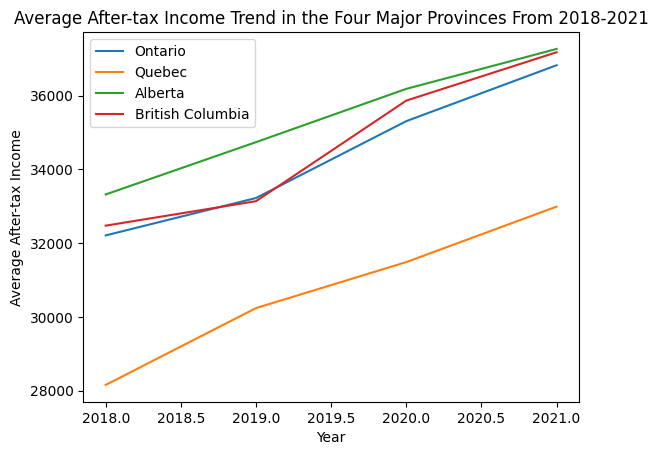

In [11]:
df_grouped['avg_income'] = df_grouped['EFATINC'] / df_grouped['EFSIZE']
df_pivot = df_grouped.pivot(index='YEAR', columns='PROV', values='avg_income')
# iterate through all four provinces
for province in major_provinces:
    plt.plot(df_pivot.index, df_pivot[province], label=province)

plt.title('Average After-tax Income Trend in the Four Major Provinces From 2018-2021')
plt.xlabel('Year')
plt.ylabel('Average After-tax Income')
plt.legend()
plt.show()